# Finding Feasible Counterfactual Explanations (FCX)

Feasible Counterfactual Explanations (FCX) is a novel framework that generates realistic and low-cost counterfactuals by enforcing both hard feasibility constraints provided by domain experts and soft causal constraints inferred from data. Built on a modified Variational Autoencoder and optimized with a multi-factor loss function, FCX produces sparse, diverse, and actionable counterfactuals while preserving causal relationships, offering both individual-level explanations and global model feasibility assessments across multiple datasets.

### KDD - Census Dataset Example

This notebook demonstrates preparation, training, and evaluation of the FCX models  
specifically for the **KDD - Census** dataset.  
We will:
1. Unpack the preprocessed data  
2. (Optional) Fine‑tune the black‑box model  
3. Train the unary and binary counterfactual generators  
4. Evaluate the trained generators  

In [ ]:
# Unzip the Adult dataset archive
#!7z x data.7z -o ./data


Load paths

In [1]:
import sys, os
import importlib.util
exp_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain'))
sys.path.insert(0, exp_dir)

fcx_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain','fcx'))
sys.path.insert(0, fcx_dir)

# compute absolute path to the `scripts` folder
scripts_dir = os.path.abspath(
    os.path.join('..', '..', 'humancompatible', 'explain', 'fcx', 'scripts')
)
sys.path.append(scripts_dir)
# 1) Compute the full path to your script
script_path = os.path.abspath(
    os.path.join('..','..','humancompatible','explain','fcx','scripts','blackbox-model-train.py')
)
# 2) Create a module spec and module object
spec = importlib.util.spec_from_file_location("blackbox_model_train", script_path)
bb_mod = importlib.util.module_from_spec(spec)

# 3) Execute the module in its own namespace
spec.loader.exec_module(bb_mod)

# 4) Extract the function
train_blackbox = bb_mod.train_blackbox

## 1. (Optional) Fine‑tune the black‑box model for KDD - Census

Run this first if the provided checkpoint isn’t compatible.

In [2]:


# Fine-tune/load the black‑box model
train_blackbox('census')

   age                 class_of_worker          major_industry_code  \
0   58  Self-employed-not incorporated                 Construction   
1   18                 Not in universe  Not in universe or children   
2    9                 Not in universe  Not in universe or children   
3   10                 Not in universe  Not in universe or children   
4   48                         Private                Entertainment   

                 major_occupation_code                   education  \
0  Precision production craft & repair  Some college but no degree   
1                      Not in universe                  10th grade   
2                      Not in universe                    Children   
3                      Not in universe                    Children   
4               Professional specialty  Some college but no degree   

   wage_per_hour                   marital_status  \
0              0                         Divorced   
1              0                    Never marr

BlackBox(
  (predict_net): Sequential(
    (0): Linear(in_features=164, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=2, bias=True)
  )
)

## 2. Train FCX on the KDD - Census dataset

Next, we train the **unary** generator, then the **binary** generator.

In [ ]:

from FCX_unary_generation_census import train_unary_fcx_vae
#!pip install networkx==2.8
# Call it for the Adult dataset
train_unary_fcx_vae(
    'census',
    base_data_dir='../../data/',
    base_model_dir='../models/',
    batch_size=2048, #2048
    epochs=25, #50
    validity=29.0,
    feasibility=192.0,
    margin=0.764
)

   age                 class_of_worker          major_industry_code  \
0   58  Self-employed-not incorporated                 Construction   
1   18                 Not in universe  Not in universe or children   
2    9                 Not in universe  Not in universe or children   
3   10                 Not in universe  Not in universe or children   
4   48                         Private                Entertainment   

                 major_occupation_code                   education  \
0  Precision production craft & repair  Some college but no degree   
1                      Not in universe                  10th grade   
2                      Not in universe                    Children   
3                      Not in universe                    Children   
4               Professional specialty  Some college but no degree   

   wage_per_hour                   marital_status  \
0              0                         Divorced   
1              0                    Never marr

## 3. Evaluate the trained models (KDD - Census)

Run evaluation scripts to compute validity and feasibility metrics.

   age                 class_of_worker          major_industry_code  \
0   58  Self-employed-not incorporated                 Construction   
1   18                 Not in universe  Not in universe or children   
2    9                 Not in universe  Not in universe or children   
3   10                 Not in universe  Not in universe or children   
4   48                         Private                Entertainment   

                 major_occupation_code                   education  \
0  Precision production craft & repair  Some college but no degree   
1                      Not in universe                  10th grade   
2                      Not in universe                    Children   
3                      Not in universe                    Children   
4               Professional specialty  Some college but no degree   

   wage_per_hour                   marital_status  \
0              0                         Divorced   
1              0                    Never marr

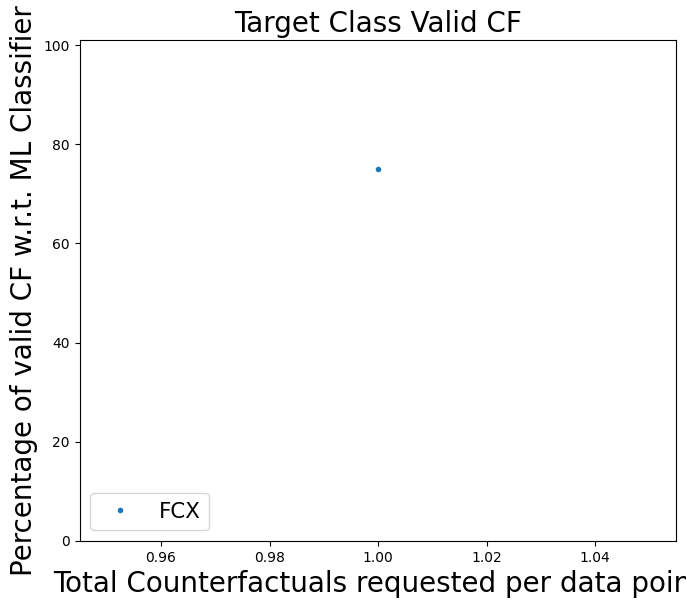

[74.99228032]
Mean Age Constraint Score:  84.55342759978521 15.446572400214784 0.8455342759978521
Mean Age Constraint Score:  84.50313339301701 15.49686660698299 0.84503133393017
Mean Age Constraint Score:  84.210056265071 15.789943734928999 0.84210056265071
Mean Age Constraint Score:  84.1545202539569 15.8454797460431 0.841545202539569
Mean Age Constraint Score:  84.45619064683748 15.543809353162516 0.8445619064683748
Mean Age Constraint Score:  84.43649373881932 15.56350626118068 0.8443649373881932
Mean Age Constraint Score:  84.83547925608012 15.164520743919885 0.8483547925608012
Mean Age Constraint Score:  84.67114093959732 15.328859060402685 0.8467114093959732
Mean Age Constraint Score:  84.75500715307582 15.244992846924177 0.8475500715307582
Mean Age Constraint Score:  84.48877359334466 15.511226406655336 0.8448877359334466


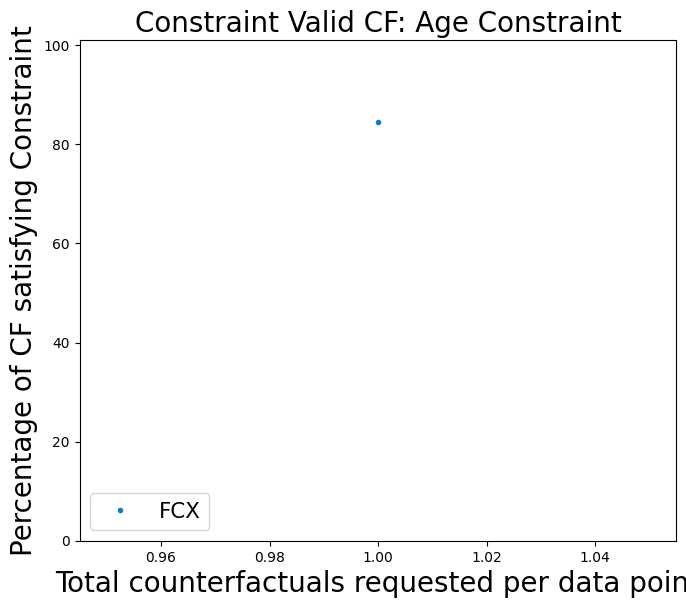

[84.50642228]
Mean Proximity Score:  -2.8220736511422553
Mean Proximity Score:  -2.8175421056080183
Mean Proximity Score:  -2.8188490733798552
Mean Proximity Score:  -2.8213744103505842
Mean Proximity Score:  -2.81717625088105
Mean Proximity Score:  -2.817966936073785
Mean Proximity Score:  -2.8199438919921693
Mean Proximity Score:  -2.817574084541054
Mean Proximity Score:  -2.814243956633343
Mean Proximity Score:  -2.8190001876241366


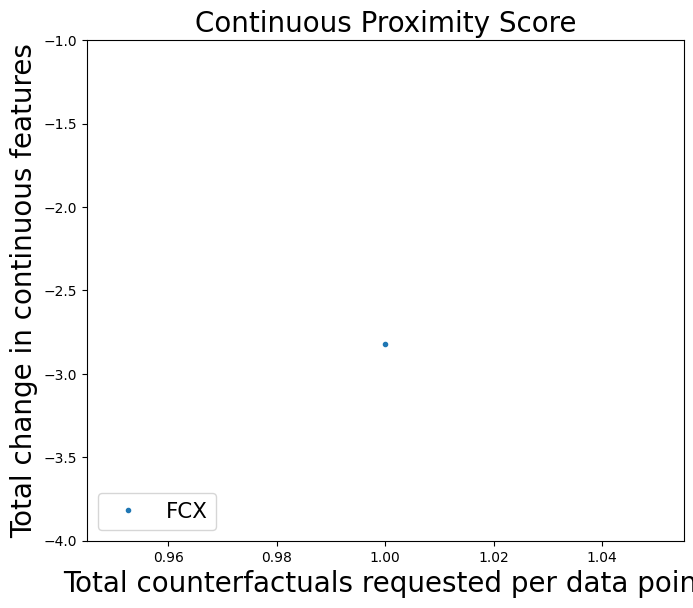

[-2.81857445]
Mean Proximity Score:  -7.962744176679869
Mean Proximity Score:  -7.961401624488152
Mean Proximity Score:  -7.960327582734779
Mean Proximity Score:  -7.963952473652413
Mean Proximity Score:  -7.963079814727798
Mean Proximity Score:  -7.961334496878566
Mean Proximity Score:  -7.964086728871585
Mean Proximity Score:  -7.962609921460697
Mean Proximity Score:  -7.962542793851111
Mean Proximity Score:  -7.9637510908236555


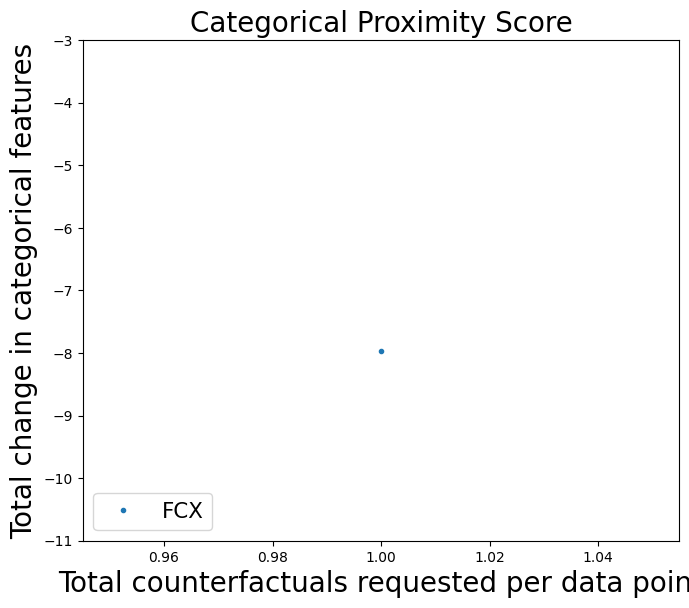

[-7.96258307]
----->> Current Average lof score 1.1800826787948608
----->> Current Average lof score 1.16477370262146
----->> Current Average lof score 1.1691313982009888
----->> Current Average lof score 1.1709309816360474
----->> Current Average lof score 1.1673742532730103
----->> Current Average lof score 1.1622645854949951
----->> Current Average lof score 1.1666603088378906
----->> Current Average lof score 1.1790329217910767
----->> Current Average lof score 1.1684001684188843
----->> Current Average lof score 1.1548572778701782


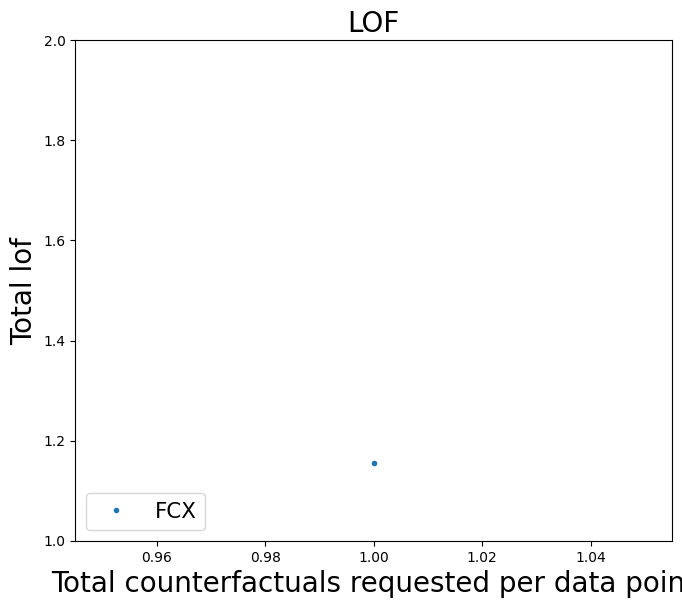

[1.1548573]
{'census': {'validity': {'FCX': [[75.0956568436598], [75.03524199503256], [74.95468886352957], [74.90769953681949], [74.87413573202659], [75.08894408270122], [75.02852923407397], [75.04195475599114], [74.87413573202659], [75.0218164731154]]}, 'const-score': {'FCX': [array([84.5534276]), array([84.50313339]), array([84.21005627]), array([84.15452025]), array([84.45619065]), array([84.43649374]), array([84.83547926]), array([84.67114094]), array([84.75500715]), array([84.48877359])]}, 'cont-prox': {'FCX': [[-2.8220736511422553], [-2.8175421056080183], [-2.8188490733798552], [-2.8213744103505842], [-2.81717625088105], [-2.817966936073785], [-2.8199438919921693], [-2.817574084541054], [-2.814243956633343], [-2.8190001876241366]]}, 'cat-prox': {'FCX': [[-7.962744176679869], [-7.961401624488152], [-7.960327582734779], [-7.963952473652413], [-7.963079814727798], [-7.961334496878566], [-7.964086728871585], [-7.962609921460697], [-7.962542793851111], [-7.9637510908236555]]}, 'LOF': 

In [ ]:

from evaluate_unary_census import evaluate_census
import warnings
warnings.filterwarnings("ignore")
res = evaluate_census(
    base_data_dir='../../data/',
    base_model_dir='../models/',
    dataset_name='census',
    pth_name = 'census-margin-0.764-feasibility-192.0-validity-29.0-epoch-25-fcx-unary.pth'
)
print(res)

Read the results from csv files